In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

In [52]:
# データの準備

X0 = np.random.multivariate_normal(mean = [1, 1], cov = [[1, -0.2], [-0.2, 1]], size = 100)
y0 = np.zeros(100)

X1 = np.random.multivariate_normal(mean = [-1, -1], cov = [[1, -0.2], [-0.2, 1]], size = 100)
y1 = np.ones(100)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

std = StandardScaler()
X = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
X_train.shape

(140, 2)

In [54]:
y_train.shape

(140,)

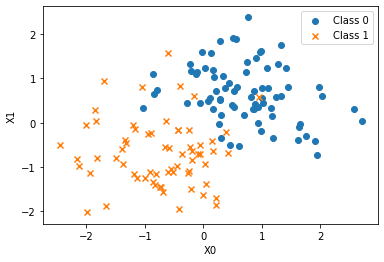

In [55]:
# 変換前のデータをプロット

fig, ax = plt.subplots()
    
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker = 'o', label = 'Class 0') # y=0 は X0 に対応
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker = 'x', label = 'Class 1') # y=1 は X1 に対応

ax.set_xlabel('X0')
ax.set_ylabel('X1')
    
ax.legend(loc = 'best')

plt.show()

In [56]:
# インスタンスを作成
svc = SVC(kernel = 'linear', C = 1e3)
    
# 結合データに学習をさせる（モデルの作成）
svc.fit(X_train, y_train)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

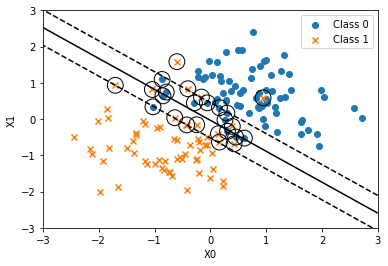

In [57]:
# プロットする（モデルの可視化）
fig, ax = plt.subplots()
    
# 先ほどを同じプロットをする
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker = 'o', label = 'Class 0') # y=0 は X0 に対応
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker = 'x', label = 'Class 1') # y=1 は X1 に対応

# マージンの線の長さを調整
xmin = -3.0
xmax = 3.0
ymin = -3.0
ymax = 3.0

# 決定境界とマージンをプロット（levels：マージンと決定境界の位置）
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    
xy = np.vstack([xx.ravel(), yy.ravel()]).T
p = svc.decision_function(xy).reshape(100, 100)  
ax.contour(xx, yy, p, colors = 'k', levels = [-1, 0, 1], alpha = 1.0, linestyles = ['--', '-', '--'])

# サポートベクタをプロット（s：〇の大きさ、alpha：線の透明度）
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 250, facecolors = 'none', edgecolors = 'black')
    
ax.set_xlabel('X0')
ax.set_ylabel('X1')
    
ax.legend(loc = 'best')

plt.show()

In [58]:
y_pred = svc.predict(X_test)
y_pred

array([1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [59]:
y_test

array([1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        25
         1.0       0.97      0.94      0.96        35

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

